In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

D:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## LOADING THE DATA

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EDA

In [3]:
df.shape

(8523, 12)

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

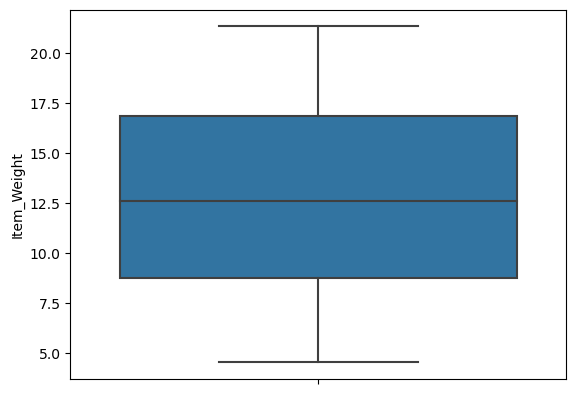

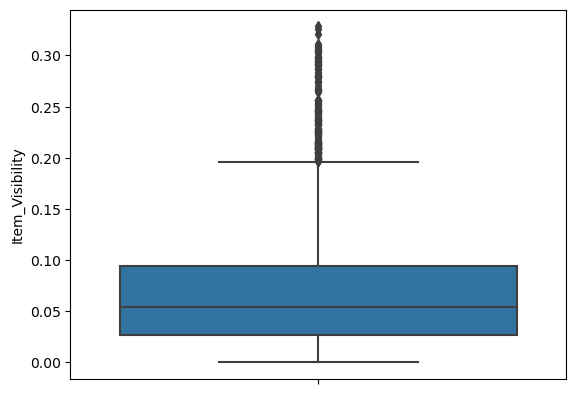

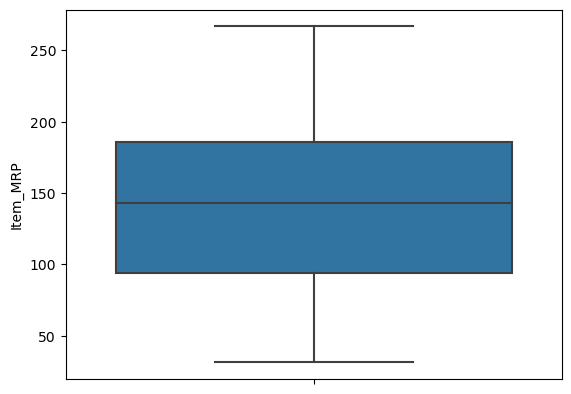

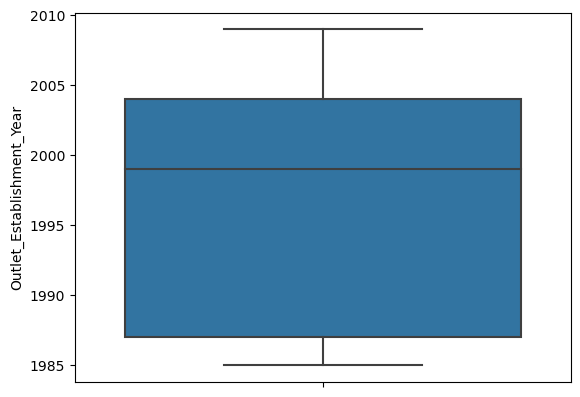

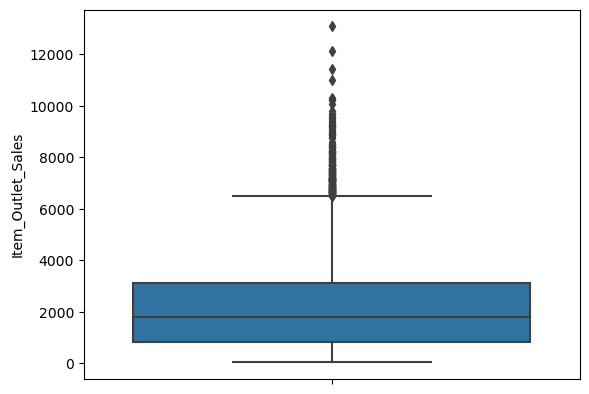

In [8]:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(y=df[i])
    plt.show()

* We found that there is some outliers in Both [Item_Outlet_Sales] and [Item_Visibility] 

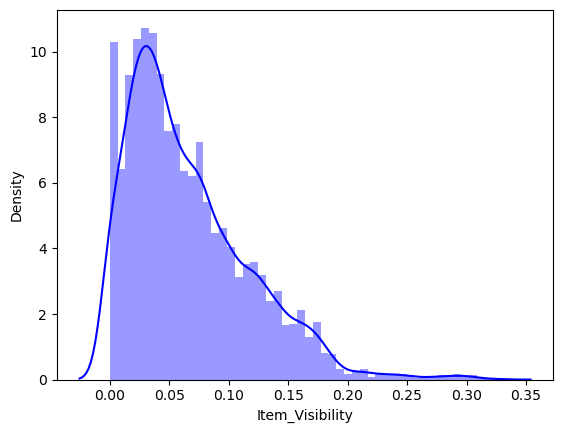

In [9]:
sns.distplot(df['Item_Visibility'], color='blue')
plt.show()

* Hence from the above graph we can observe that Item_Visibility feature is positively skewed

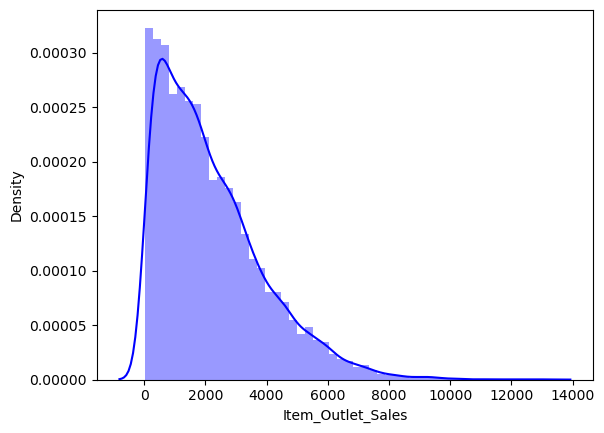

In [10]:
sns.distplot(df['Item_Outlet_Sales'], color='blue')
plt.show()

* Hence from the above graph we can observe that Item_Outlet_Sales feature is positively skewed

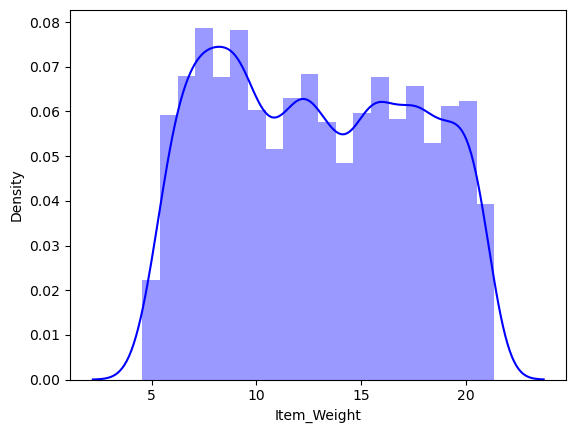

In [11]:
sns.distplot(df['Item_Weight'], color='blue')
plt.show()

* Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12     Kg where the mean is 12.85 Kg 
  Therefore in this 8523 products the average weight is about 12.8 Kg

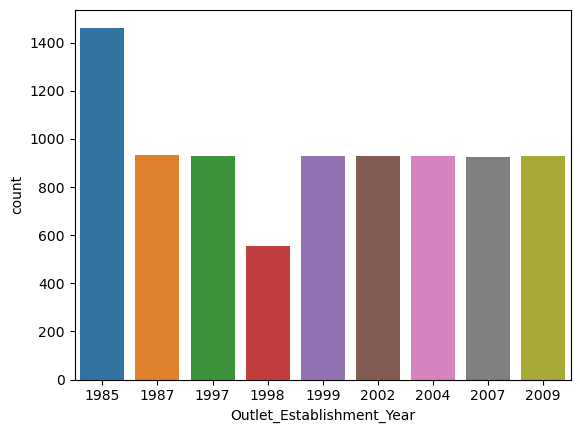

In [12]:
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

* Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009

* Therefore these are the years on which different outlets or different stores have been established

* We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

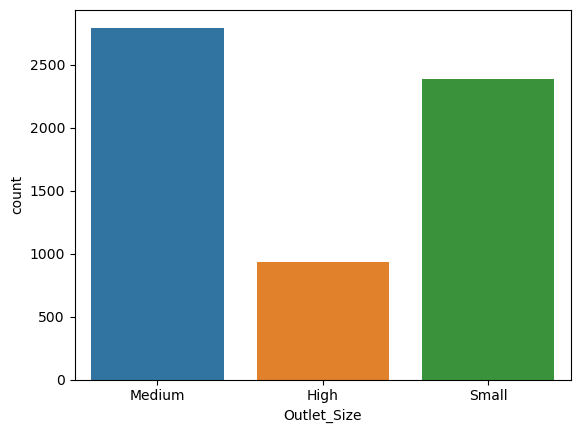

In [13]:
sns.countplot(x='Outlet_Size', data=df)
plt.show()

* From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high
* The most outlet_size is size **Small** while **High** is the least

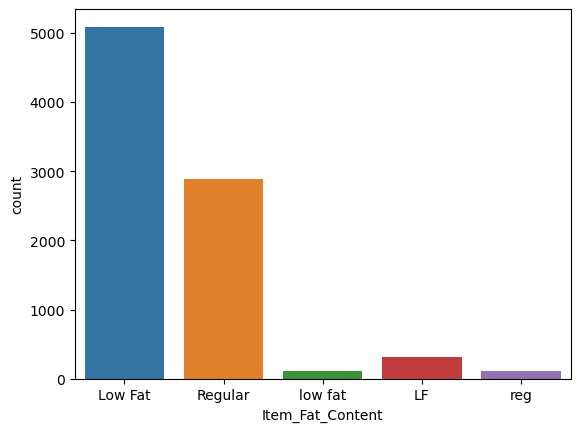

In [14]:
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

* The Item_Fat_Content column needs cleaning as it contains duplicates (e.g. Low Fat and LF).
* Values like 'Low fat' and 'low fat' should be grouped under a single label.
* Similarly 'Regular' and 'reg' need to be aggregated into one entity.
* This column needs preprocessing to handle the inconsistent categories.
* We will deal with cleaning this column after visualizing the data.

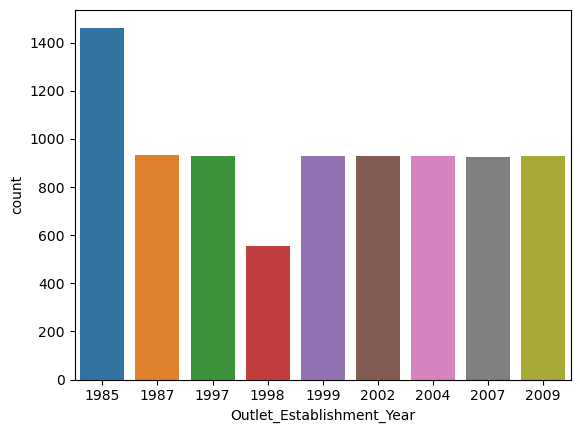

In [15]:
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

* The graph shows outlet establishment dates ranging from 1985 to 2009.
* Most outlets were established in 1985, with declining openings in later years.
* 1998 saw the fewest new outlets.
* Other than 1985, establishment dates are relatively evenly distributed across the remaining years.

# Data Cleansing

In [16]:
print(df.duplicated().value_counts())

False    8523
dtype: int64


## Filling missing Values

#### Filling missing numerical values using KNN imputation

* KNN imputation looks at the k nearest neighbors to impute the missing value. 
* It uses the correlation structure between the features to estimate the missing values.
* This can be more accurate than simply imputing with the mean, median or mode, 

In [17]:
from sklearn.impute import KNNImputer
 
imputer = KNNImputer()

# Fit on the Item_Weight column
imputer.fit(df['Item_Weight'].to_numpy().reshape(-1,1))  

# Impute missing values
imputed_weight = imputer.transform(df['Item_Weight'].to_numpy().reshape(-1,1))

# Put imputed values back into dataframe
df['Item_Weight'] = imputed_weight

* Imputing missing outlet size values by outlet type mode

* Since outlet size distribution may vary between different outlet types, 
* we calculate the mode of outlet size separately for each outlet type.

* This allows us to impute the missing values with the most frequent outlet size  
* specific to that outlet type.

* Grouping by outlet type and imputing with the mode preserves the distribution within 
* each outlet category instead of distorting it by imputing a global mode.

In [18]:
outlet_size_modes = df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])
print(outlet_size_modes)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [19]:
for i, outlet_type in enumerate(df['Outlet_Type'].unique()):
    df.loc[df['Outlet_Type'] == outlet_type, 'Outlet_Size'] = df.loc[df['Outlet_Type'] == outlet_type, 'Outlet_Size'].fillna(outlet_size_modes[i])

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Handling zero values in Item_Visibility 

* The 'Item_Visibility' column contains some 0 values, which implies no visibility.
* However, this is likely erroneous data, since visibility cannot be absolutely 0 in reality. 


In [21]:
mean_visibility = df['Item_Visibility'].mean() 

zero_rows = df['Item_Visibility'] == 0

df.loc[zero_rows, 'Item_Visibility'] = mean_visibility

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###  | Handle ouliers |


In [25]:
def handle_outlier(df, col_name):
    Q1, Q3 = df[col_name].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    df.loc[df[col_name] < lower, col_name] = lower
    df.loc[df[col_name] > upper, col_name] = upper

In [26]:
handle_outlier(df, 'Item_Outlet_Sales')
handle_outlier(df, 'Item_Visibility')

## Encoding

In [27]:
df_categorical_features = df.select_dtypes(include='object')

In [28]:
df_categorical_features.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1


In [29]:
for col in df_categorical_features:
  print(col ,df_categorical_features[col].unique())
  print('\n')

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content ['Low Fat' 'Regular']


Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size ['Medium' 'High' 'Small']


Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




## Here is how I would encode the categorical columns in this data:

### One-hot encode:

* Item_Fat_Content - Low cardinality (only 2 values)
* Outlet_Size - Low cardinality (3 values)

### Label encode:

* Item_Type - High cardinality (15 unique values)
* Outlet_Location_Type - Ordinal categories (Tier 1, 2, 3)
* Outlet_Type - Nominal but high cardinality (4 values)
### Do not encode:

* Item_Identifier - Unique ID column
* Outlet_Identifier - Unique ID column

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_cols = ['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

for column in le_cols:
    le.fit(df[column])
    df[column] = le.transform(df[column])


In [31]:
oh_cols = ['Item_Fat_Content', 'Outlet_Size']
df = pd.get_dummies(df, columns=oh_cols)

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,0,1,3735.1380,1,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,2,2,443.4228,0,1,0,1,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,0,1,2097.2700,1,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,2,0,732.3800,0,1,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,2,1,994.7052,1,0,1,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Item_Fat_Content_Low Fat   8523 non-null   uint8  
 11  Item_Fat_Content_Regular   8523 non-null   uint8  
 12  Outlet_Size_High           8523 non-null   uint8  
 13  Outlet_Size_Medium         8523 non-null   uint8

In [34]:
df = df.drop(columns = ['Item_Identifier','Outlet_Identifier'] )

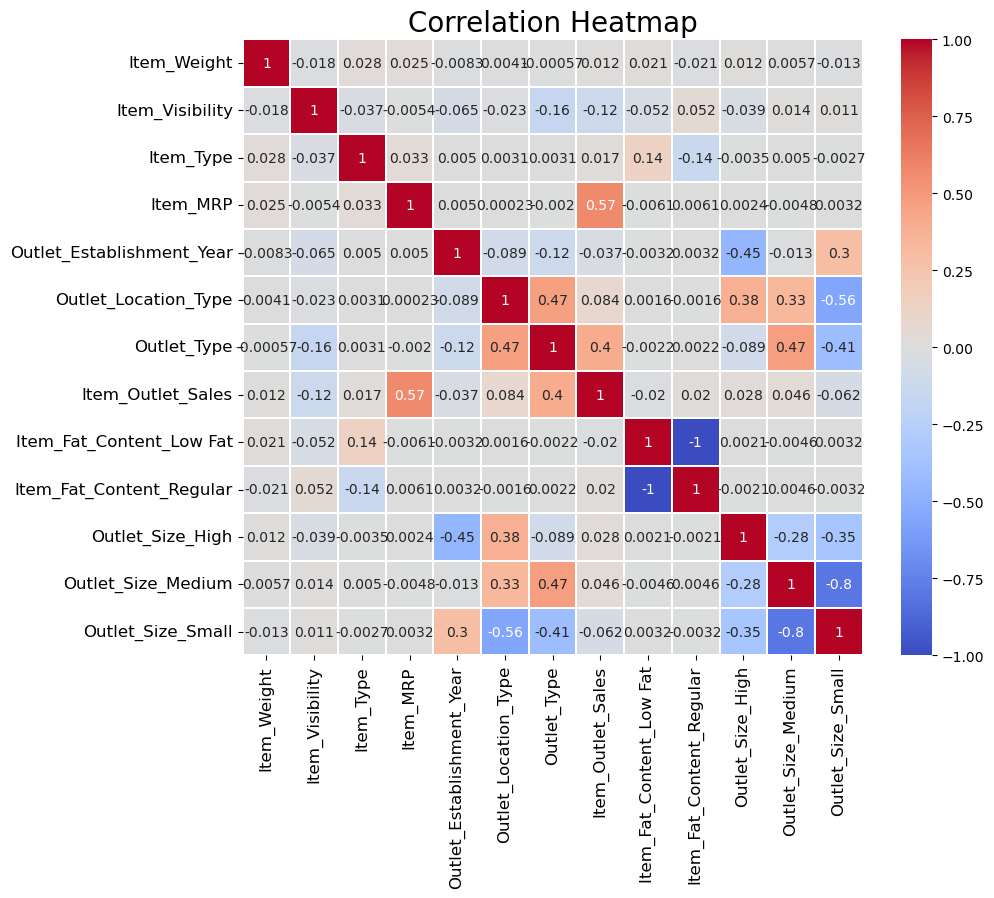

In [35]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.2)

plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* Item_MRP - Include this, as it has the strongest correlation (0.57) with the target variable. Higher priced items tend to have higher sales.
* Outlet_type has also a high correlation with the Item_outlet_sales

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   int32  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   int32  
 6   Outlet_Type                8523 non-null   int32  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Item_Fat_Content_Low Fat   8523 non-null   uint8  
 9   Item_Fat_Content_Regular   8523 non-null   uint8  
 10  Outlet_Size_High           8523 non-null   uint8  
 11  Outlet_Size_Medium         8523 non-null   uint8  
 12  Outlet_Size_Small          8523 non-null   uint8  
dtypes: float64(4), int32(3), int64(1), uint8(5)
memo

# Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
x = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_scaled = scaler.fit_transform(x)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=20)

X_train.shape , y_train.shape

((6818, 12), (6818,))

### Lasso 

In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lasso = Lasso() 


lasso.fit(X_train, y_train)


y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred) 
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Lasso Regression Accuracy:")
print("Training MSE:", train_mse)
print("Training R-Squared:", train_r2) 
print("Testing MSE:", test_mse)
print("Testing R-Squared:", test_r2)

Lasso Regression Accuracy:
Training MSE: 1238968.085019308
Training R-Squared: 0.5352596578787687
Testing MSE: 1137190.352046552
Testing R-Squared: 0.5509588939814682


## Ridge

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha = 0.1)

ridge.fit(X_train, y_train) 

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Ridge Regression Accuracy:")
print("Training MSE:", train_mse)
print("Training R-Squared:", train_r2) 
print("Testing MSE:", test_mse)
print("Testing R-Squared:", test_r2)

Ridge Regression Accuracy:
Training MSE: 1238949.8077100217
Training R-Squared: 0.535266513747837
Testing MSE: 1137309.5496797443
Testing R-Squared: 0.5509118265428928


## RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Specify model 
rf = RandomForestRegressor(n_estimators=100)

# Fit on training data
rf.fit(X_train, y_train)  

# Predict on train and test
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred) 
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Regression Accuracy:")
print("Training MSE:", train_mse)
print("Training R-Squared:", train_r2)  
print("Testing MSE:", test_mse)
print("Testing R-Squared:", test_r2)

Random Forest Regression Accuracy:
Training MSE: 163792.19736228228
Training R-Squared: 0.9385610955121987
Testing MSE: 1086196.2426627693
Testing R-Squared: 0.5710948819775978


## GradientBoostingRegressor

In [44]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.1, 0.05, 0.01]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gbr = GradientBoostingRegressor()
grid = GridSearchCV(gbr, param_grid=params, scoring=scorer, cv=cv)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Best cross-validation score: -1043619.390790469


In [45]:
final_model = GradientBoostingRegressor(n_estimators=grid.best_params_['n_estimators'],
                                        learning_rate=grid.best_params_['learning_rate'])

final_model.fit(X_train, y_train)

y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Tuned model test MSE:", test_mse) 
print("Tuned model test R-squared:", test_r2)

Tuned model test MSE: 955014.6839742409
Tuned model test R-squared: 0.6228944000589123


## Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred) 
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Accuracy:")
print("Training MSE:", train_mse)
print("Training R-Squared:", train_r2)  
print("Testing MSE:", test_mse)
print("Testing R-Squared:", test_r2)

Linear Regression Accuracy:
Training MSE: 1238942.2488541815
Training R-Squared: 0.5352693490954878
Testing MSE: 1137202.850961336
Testing R-Squared: 0.5509539585487075
